1. Row_df 만들기
csv는 kaggle 출처

In [1]:
import pandas as pd

df1 = pd.read_csv('.\\dataset\\hate_speech_data.csv')
df2 = pd.read_csv('.\\dataset\\hate_speech_binary_dataset2.csv')
df1.drop('Unnamed: 0', inplace=True, axis=1)

df = pd.concat((df1, df2), ignore_index=True)
display(df.head(5))


,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


2. 결측치 제거

In [ ]:

df.dropna(axis=0, inplace=True)
df.isnull().sum(axis=0)
display(df.head(5))

,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


In [ ]:
import numpy as np

count_data = []
for i in range(len(df)):
    count=0
    data = df.iloc[i, 0]
    
    for j in data:
        count+=1
    count_data.append(count)

count_data = np.array(count_data)
df['문자 개수'] = count_data

                           문장  혐오 여부  문자 개수
0                  지금 어디 계세요?      0     10
1              한국 시간에 시계 맞췄어?      0     14
2            햄버거 두 개랑 콜라 주세요.      0     16
3            우리는 밤새 춤추고 노래했다.      0     16
4  무엇보다도, 스트레스를 줄이는 것이 중요합니다.      0     26


In [40]:
display(df.head(5))

,문장,혐오 여부,문자 개수
0,지금 어디 계세요?,0,10
1,한국 시간에 시계 맞췄어?,0,14
2,햄버거 두 개랑 콜라 주세요.,0,16
3,우리는 밤새 춤추고 노래했다.,0,16
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0,26


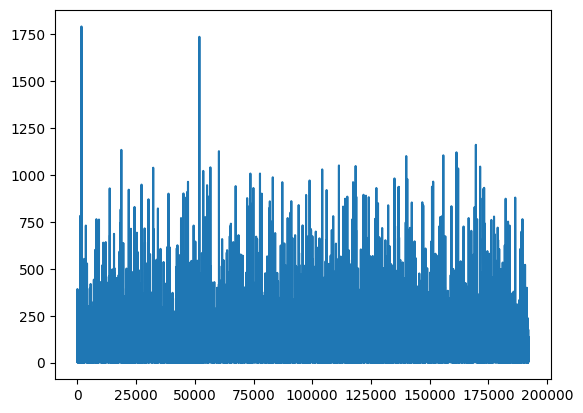

In [42]:
import matplotlib.pyplot as plt

plt.plot(df['문자 개수'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191995 entries, 0 to 191999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   문장      191995 non-null  object
 1   혐오 여부   191995 non-null  int64 
 2   문자 개수   191995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


2. 데이터 분포 비교
혐오 여부의 0과1 에대한 실제 계수와 비율 비교


In [ ]:
zero = (df['혐오 여부'] == 0)
one = (df['혐오 여부'] == 1)
df_count = df.count()
zero_count = df.loc[zero, ['혐오 여부']].count()
zero_rate = zero_count / df_count

one_count = df.loc[one, ['혐오 여부']].count()
one_rate = one_count / df_count




display(zero_rate['혐오 여부'], one_rate['혐오 여부'])
display(zero_count['혐오 여부'], one_count['혐오 여부'])


np.float64(0.4739654678507253)

np.float64(0.5260345321492748)

np.int64(90999)

np.int64(100996)

In [46]:
df['문자 개수'].describe()

count    191995.000000
mean         38.761384
std          49.766768
min           1.000000
25%          15.000000
50%          26.000000
75%          44.000000
max        1790.000000
Name: 문자 개수, dtype: float64

3. 이상치 확인 및 제거

In [ ]:
filt = df['문자 개수'] > 500

df[filt].count()

문장       348
혐오 여부    348
문자 개수    348
dtype: int64

In [54]:
df = df.drop(index=df[filt].index)
display(df.head(5), df.describe())

C:\Users\Samsung\AppData\Local\Temp\ipykernel_22108\1786019617.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(index=df[filt].index)


,문장,혐오 여부,문자 개수
0,지금 어디 계세요?,0,10
1,한국 시간에 시계 맞췄어?,0,14
2,햄버거 두 개랑 콜라 주세요.,0,16
3,우리는 밤새 춤추고 노래했다.,0,16
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0,26


,혐오 여부,문자 개수
count,191647.000000,191647.000000
mean,0.526974,37.581851
std,0.499273,40.724655
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,499.000000


4. train/valid 나누기

In [ ]:
all = df['문장'].count()
train_len = int(all*0.8)
train = df.iloc[0:train_len]
valid = df.iloc[train_len:]

display(train.tail(5), valid.head(5))

,문장,혐오 여부,문자 개수
153604,"노래,춤이 잘 어우러지고..45년 전 영화라는게 안 믿기네요^o^",1,36
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27
153606,진쨔 재밌어 요ㅠㅠㅠ 정말정말,1,16
153607,우연히 만날수있는 경우의수도 있어서 ㅁㅈㅎ,0,23
153608,과거(사연)는 필요없다. 있는 그대로 바라보면 될 뿐이다.,1,32


,문장,혐오 여부,문자 개수
153609,얘 탈홍어임 아프리카 방송했을떄 봤는데 전향서쓴거 ㅇㅈ,0,30
153610,"이 사람, 재능기부로 어려운 학생들도 많이 도와주고 좋은 일은 많이 한 걸로 안다....",0,129
153611,뭐.. 좀 보기그런장면이 있었긴하지만 저는감동받아서정말 임창정이 불쌍해서 울기도했음...,1,49
153612,@얼grey 다 알겄지..명분 쌓는중이다 트럼프도,0,27
153613,밀양은 계속되고 있습니다. 영화 완성도도 괜찮네요. 많이들 봐주세요!,1,38


In [64]:
display(train.describe(), valid.describe())

,혐오 여부,문자 개수
count,153317.000000,153317.000000
mean,0.527756,37.569539
std,0.499231,40.771319
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,499.000000


,혐오 여부,문자 개수
count,38330.000000,38330.000000
mean,0.523846,37.631098
std,0.499438,40.537956
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,499.000000


5. 모델의 입력 및 출력 고정
x축은 문장
y축은 혐오 여부

In [67]:
x = train['문장']
y = train['혐오 여부']

In [70]:
display(x.head(5))

0                    지금 어디 계세요?
1                한국 시간에 시계 맞췄어?
2              햄버거 두 개랑 콜라 주세요.
3              우리는 밤새 춤추고 노래했다.
4    무엇보다도, 스트레스를 줄이는 것이 중요합니다.
Name: 문장, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    analyzer='word',      # 단어 단위
    token_pattern=r'\S+', # 공백 기준 토큰
    max_features=5000,    # (선택) 최대 단어 수
)

X_word = word_vectorizer.fit_transform(df['문장'])
print(X_word.shape)